<a href="https://colab.research.google.com/github/gauravcr7rm/Emotion-detection-using-audio-signals/blob/main/preLim_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import librosa
import matplotlib.pyplot as plt

In [ ]:
!unzip '/content/samplewavfilestostartyourworkon.zip'

Archive:  /content/samplewavfilestostartyourworkon.zip
  inflating: dia26_utt10.wav         
  inflating: dia6_utt6.wav           
  inflating: dia73_utt2.wav          
  inflating: dia73_utt0.wav          
  inflating: dia104_utt11.wav        
  inflating: dia82_utt9.wav          
  inflating: dia110_utt4.wav         
  inflating: dia72_utt13.wav         
  inflating: dia28_utt5.wav          
  inflating: dia50_utt3.wav          
  inflating: dia32_utt2.wav          
  inflating: dia104_utt12.wav        
  inflating: dia54_utt6.wav          
  inflating: dia31_utt2.wav          
  inflating: dia63_utt15.wav         
  inflating: dia1_utt8.wav           
  inflating: dia56_utt7.wav          
  inflating: dia4_utt4.wav           
  inflating: dia105_utt1.wav         
  inflating: dia1_utt6.wav           
  inflating: dia51_utt6.wav          
  inflating: dia88_utt0.wav          
  inflating: dia66_utt0.wav          
  inflating: dia22_utt7.wav          
  inflating: dia76_utt14.wav     

In [ ]:
data, sr = librosa.load('/content/dia104_utt11.wav')
print(data)
print(sr)
print(data.shape)

[-1.3630124e-06  1.7203926e-06 -2.0192617e-06 ...  3.4933729e-04
  4.0128926e-04  1.3089775e-03]
22050
(25402,)


In [ ]:
!pip install kapre

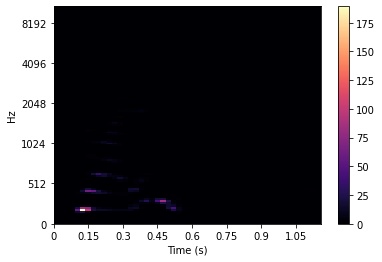

In [ ]:
spec = librosa.feature.melspectrogram(y=data, sr=sr)
import librosa.display
librosa.display.specshow(spec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar()

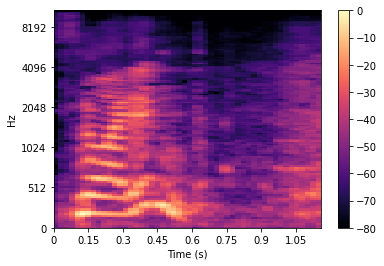

In [ ]:
import numpy as np
db_spec = librosa.power_to_db(spec, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar();

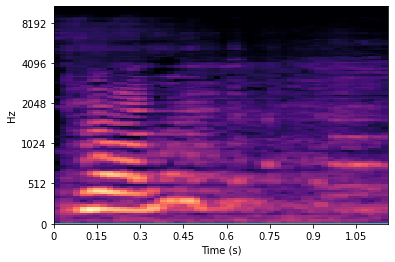

In [ ]:
data_h, data_p = librosa.effects.hpss(data)
spec_h = librosa.feature.melspectrogram(data_h, sr=sr)
spec_p = librosa.feature.melspectrogram(data_p, sr=sr)
db_spec_h = librosa.power_to_db(spec_h,ref=np.max)
db_spec_p = librosa.power_to_db(spec_p,ref=np.max)
librosa.display.specshow(db_spec_h,y_axis='mel', x_axis='s', sr=sr)
plt.plot(spec_h);


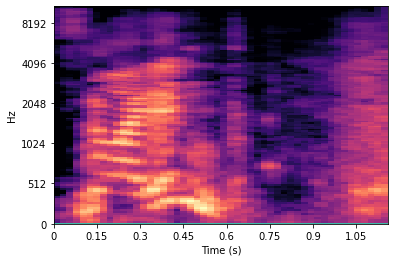

In [ ]:
librosa.display.specshow(db_spec_p,y_axis='mel', x_axis='s', sr=sr)
plt.plot(spec_p);

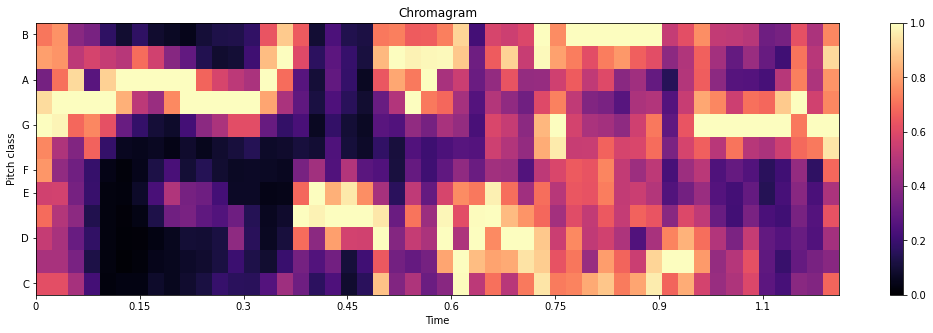

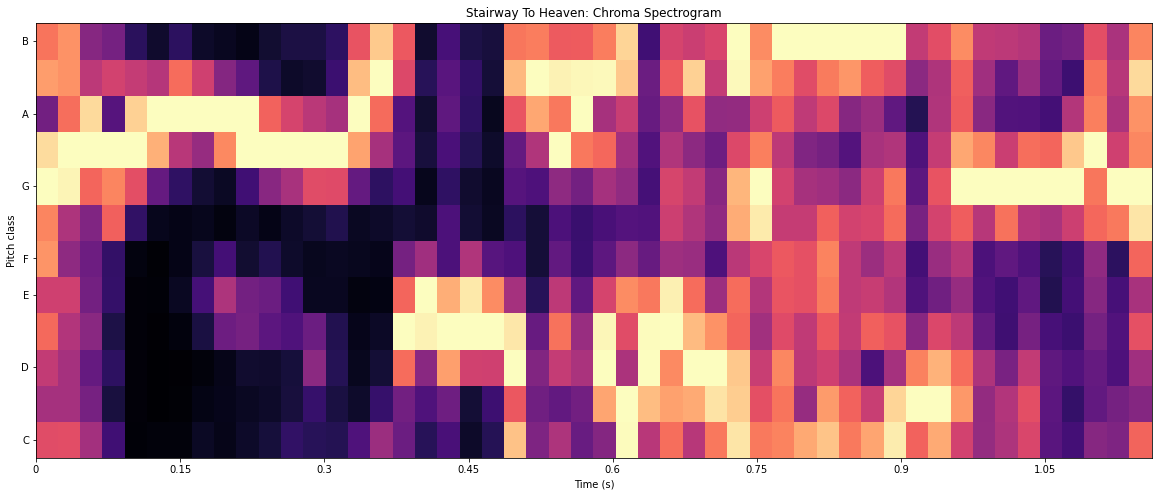

In [ ]:
chroma = librosa.feature.chroma_cqt(y=data_h, sr=sr)
plt.figure(figsize=(18,5))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram')
plt.colorbar()
plt.figure(figsize=(20,8))
plt.title('Stairway To Heaven: Chroma Spectrogram')
librosa.display.specshow(chroma, sr=sr, x_axis='s', y_axis='chroma', );

In [ ]:
import os
import wave

import pylab
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig(wav_file + '.png')
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [ ]:
graph_spectrogram('/content/dia104_utt11.wav')

In [ ]:
local_download_path = '/content/'
for filename in os.listdir(local_download_path):
    if filename.endswith("wav"): 
       graph_spectrogram(filename);

In [ ]:
import cv2
img = cv2.imread('/content/dia104_utt12.wav.png')
#cv2.imshow('sample image',img)
print(img.shape)

(864, 1368, 3)


In [ ]:
import numpy as np
img.shape

(864, 1368, 3)

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from pickle import dump

Using TensorFlow backend.


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from pickle import dump
# load an image from file
image = load_img('/content/drive/My Drive/spectroimage_folder/image folder/dia0_utt0.wav.png', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load model
model = ResNet50(weights = "imagenet")
# remove the output layer
model.layers.pop()
#model.layers.pop()
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
model.summary()
#get extracted features
features = model.predict(image)
print(features.shape)
# save to file
#dump(features, open('dog.pkl', 'wb'))

In [ ]:
image = load_img('/content/dia104_utt11.wav.png', target_size=(224,224,3))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
model = VGG16()
"""model.layers.pop()
model.layers.pop()
model.layers.pop()
model.layers.pop()
#model.layers.pop()"""
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
model.summary()
"""features = model.predict(image)
print(features.shape)
#dump(features, open('dog.pkl', 'wb'))"""

In [ ]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import numpy as np

model = VGG16(include_top=False, input_shape=(300, 300, 3))
flat1 = Flatten()(model.outputs)
class1 = Dense(1024, activation='relu')(model.outputs)
output = Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)

"""model = VGG16(include_top=False, input_shape=(300, 300, 3))
flat1 = Flatten()(model.outputs)
att_in = attention()(flat1)
model.summary( )
class1 = Dense(1024, activation='relu')(att_in)
output = Dense(10, activation='softmax')(class1)
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()"""


In [ ]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip -q '/content/drive/My Drive/test_audio_wav.zip' -d '/content/sample_data'

In [ ]:
import os
import wave

import pylab
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig(wav_file + '.png')
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [ ]:
!cd '/content/sample_data/spectrogram images'
import os

/bin/bash: line 0: cd: /content/sample_data/spectrogram images: No such file or directory


In [ ]:
import os.path
from os import path
a = 0
b = 0
local_download_path = '/content/sample_data/test_audio_wav/'
for filename in os.listdir(local_download_path):
    if filename.endswith("wav"):
      a = a+1
      if path.exists('/content/sample_data/test_audio_wav/' +filename + '.png') == False:
         b = b+1#graph_spectrogram('/content/sample_data/test_audio_wav/'+filename);#b = b+1
print(a)
print(b)

In [ ]:
import shutil
for filename in os.listdir(local_download_path):
    if filename.endswith("png"):
      shutil.move(local_download_path + filename, '/content/sample_data/image folder/')


In [ ]:
shutil.move('/content/test_sent_emo.csv', '/content/drive/My Drive/spectroimage_folder')

'/content/drive/My Drive/spectroimage_folder/test_sent_emo.csv'

In [ ]:
local_download_path = '/content/drive/My Drive/spectroimage_folder/image folder'
cnt = 0
for filename in os.listdir(local_download_path):
    if filename.endswith("png"):
      cnt = cnt+1
print(cnt)

2747


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/spectroimage_folder/test_sent_emo.csv')

In [ ]:
train.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378"
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385"
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520"
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146"
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833"


In [ ]:
df["join_dia_utter"] = df["Dialogue_ID"].map(str) + df["Utterance_ID"].map(str)

In [ ]:
l = df[(df.Dialogue_ID == 93) & (df.Utterance_ID == 9)][['Emotion']]
s=l.values[0][0]
print(s)



neutral


In [ ]:
import os
len(sorted(os.listdir('/content/drive/My Drive/spectroimage_folder/image folder')))

2747

In [ ]:
sorted(os.listdir('/content/drive/My Drive/spectroimage_folder/image folder'))

In [ ]:
def listToString(s):  
    str1 = ""   
    for ele in s:  
        str1 += ele   
    return str1 

In [ ]:
list_audios = []
import os
for audio in sorted(os.listdir('/content/drive/My Drive/spectroimage_folder/image folder')):
    list_audios.append(audio.split('.')[0])
list_audios

In [ ]:
path_face = '/content/drive/My Drive/spectroimage_folder/image folder'
import shutil
for frame in sorted(os.listdir(path_face)):
  print(frame)
  if frame != ".ipynb_checkpoints":
   l = frame.split('.')
   #print(l)
   f = listToString(l[0])
   #print(frame)
   dia_no = int(f.split('dia')[1].split('_utt')[0])
   #print(dia_no)
   utt_no = int(f.split('dia')[1].split('_utt')[1].split('_')[0])
   #print(utt_no)
   if dia_no is not 0:
     print(dia_no)
     emotion = df[(df.Dialogue_ID == dia_no) & (df.Utterance_ID == utt_no)][['Emotion']].values[0][0]
     emotion = emotion.capitalize()
   #print(emotion)
   #sentiment = df[(df.Dialogue_ID == dia_no) & (df.Utterance_ID == utt_no)][['Sentiment']].values[0][0]
     if emotion == 'Anger':
       emotion = 'Untitled Folder'
     shutil.copy(path_face + '/' + frame, '/content/drive/My Drive/spectroimage_folder/' + emotion)
                   # shutil.copyfile(path_face + '/' + frame, path_to_save_sentiment_face + '/' + sentiment + '/' + frame)"""

In [ ]:
for filename in os.listdir('/content/drive/My Drive/spectroimage_folder/Neutral'):
  os.remove('/content/drive/My Drive/spectroimage_folder/Neutral/' + filename)

In [ ]:
len(os.listdir('/content/drive/My Drive/spectroimage_folder/Fear')) + len(os.listdir('/content/drive/My Drive/spectroimage_folder/Sadness')) +len(os.listdir('/content/drive/My Drive/spectroimage_folder/Joy')) +len(os.listdir('/content/drive/My Drive/spectroimage_folder/Disgust'))+len(os.listdir('/content/drive/My Drive/spectroimage_folder/Neutral'))+len(os.listdir('/content/drive/My Drive/spectroimage_folder/Untitled Folder'))+len(os.listdir('/content/drive/My Drive/spectroimage_folder/Surprise'))

2740

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from pickle import dump

Using TensorFlow backend.


In [ ]:
!cd '/content/drive/My Drive/spectroimage_folder'

In [ ]:
image_path = '/content/drive/My Drive/spectroimage_folder/image folder'
model = ResNet50(weights = "imagenet")
model.layers.pop()
#model.layers.pop()
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
#filename = 'dia0_utt0.wav.png'
import os
for filename in sorted(os.listdir(image_path)):
  if filename != ".ipynb_checkpoints":
    image = load_img(image_path + '/' + filename, target_size=(224,224,3))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    features = model.predict(image)
    #print(features.shape)
    dump(features, open(filename + '.pkl', 'wb'))

In [ ]:
import shutil
path_file = '/content/'
for filename in sorted(os.listdir(path_file)):
  if filename.endswith('.pkl'):
    shutil.move(path_file + filename, '/content/drive/My Drive/spectroimage_folder/pickle_folder')


In [ ]:
print(len(os.listdir(' /content/drive/My Drive/spectroimage_folder/pickle_folder')))

2742


In [ ]:
import pickle
feature_sample = pickle.load(open('/content/drive/My Drive/spectroimage_folder/pickle_folder/dia0_utt0.wav.png.pkl','rb'))

In [ ]:
feature_sample.shape

(1, 2048)

In [ ]:
print(feature_sample)

[[1.0830824  0.03754042 0.41538557 ... 0.47055343 0.06588211 0.73908734]]


In [ ]:
for filename in os.listdir('/content/drive/My Drive/spectroimage_folder/pickle_folder'):
  s = filename.split('.')[0]
  new_name = listToString(s)+'.pkl'
  os.rename(r'/content/drive/My Drive/spectroimage_folder/pickle_folder/'+filename, r'/content/drive/My Drive/spectroimage_folder/pickle_folder'+new_name)

In [ ]:
len(os.listdir('/content/drive/My Drive/spectroimage_folder/pickle_folder'))

0

In [ ]:
d =  'pickle_folderdia0_utt0.pkl'
f = d.split('pickle_folder')
print(f)

['', 'dia0_utt0.pkl']


In [ ]:
import shutil
for filename in os.listdir('/content/drive/My Drive/spectroimage_folder'):
   if filename.endswith('.pkl'):
     s = listToString(filename.split('pickle_folder')[1])
     os.rename(r'/content/drive/My Drive/spectroimage_folder/'+filename, r'/content/drive/My Drive/spectroimage_folder/'+s)

In [ ]:
for filename in os.listdir('/content/drive/My Drive/spectroimage_folder'):
  if filename.endswith('.pkl'):
    shutil.move('/content/drive/My Drive/spectroimage_folder/'+filename, '/content/drive/My Drive/spectroimage_folder/pickle_folder')
    

In [ ]:
emotion_dict = {'joy':1, 'anger':2, 'sadness':3, 'surprise':4, 'neutral':5, 'fear':6, 'disgust':7}
x_train = []
y_train = []
x_test = []
y_test = []

In [ ]:
import os
import pickle
path = '/content/drive/My Drive/spectroimage_folder/pickle_folder'
for filename in sorted(os.listdir(path)):
   l = filename.split('.') 
   f = listToString(l[0])
   dia_no = int(f.split('dia')[1].split('_utt')[0])
   utt_no = int(f.split('dia')[1].split('_utt')[1].split('_')[0])
   feature_sample = pickle.load(open(path +'/'+filename,'rb'))
   emotion = df[(df.Dialogue_ID == dia_no) & (df.Utterance_ID == utt_no)][['Emotion']].values[0][0]
   if dia_no < 230:
     x_train.append(feature_sample)
     y_train.append(emotion_dict[emotion])
   else:
     x_test.append(feature_sample)
     y_test.append(emotion_dict[emotion])

   

IndexError: ignored

In [ ]:
x_train[0].shape

(1, 2048)

In [ ]:
from pickle import dump
dump(x_train, open('x_train' + '.pkl', 'wb'))
dump(y_train, open('y_train' + '.pkl', 'wb'))
dump(x_test, open('x_test' + '.pkl', 'wb'))
dump(y_test, open('y_test' + '.pkl', 'wb'))

In [ ]:
import shutil
shutil.move('/content/x_test.pkl','/content/drive/My Drive/spectroimage_folder')
shutil.move('/content/y_test.pkl','/content/drive/My Drive/spectroimage_folder')
shutil.move('/content/x_train.pkl','/content/drive/My Drive/spectroimage_folder')
shutil.move('/content/y_train.pkl','/content/drive/My Drive/spectroimage_folder')

'/content/drive/My Drive/spectroimage_folder/y_train.pkl'

In [ ]:
import pickle 
x_train = pickle.load(open('/content/drive/My Drive/spectroimage_folder/x_train.pkl','rb'))
x_test = pickle.load(open('/content/drive/My Drive/spectroimage_folder/x_test.pkl','rb'))
y_train = pickle.load(open('/content/drive/My Drive/spectroimage_folder/y_train.pkl','rb'))
y_test = pickle.load(open('/content/drive/My Drive/spectroimage_folder/y_test.pkl','rb'))
print(y_train)

[4, 2, 5, 5, 5, 3, 5, 5, 5, 6, 6, 5, 5, 6, 3, 5, 5, 5, 3, 3, 5, 5, 5, 1, 5, 3, 5, 2, 5, 4, 5, 2, 3, 2, 3, 5, 1, 1, 5, 6, 4, 2, 4, 1, 4, 5, 2, 6, 2, 2, 5, 7, 3, 5, 5, 5, 5, 4, 1, 3, 5, 1, 3, 3, 5, 5, 7, 2, 2, 1, 1, 4, 4, 1, 1, 1, 2, 5, 4, 2, 5, 4, 2, 5, 5, 5, 4, 5, 5, 4, 1, 5, 3, 1, 7, 5, 5, 2, 5, 5, 4, 5, 1, 2, 3, 2, 3, 3, 3, 6, 5, 5, 5, 1, 4, 4, 4, 5, 1, 5, 5, 1, 7, 1, 5, 7, 4, 5, 2, 2, 5, 5, 2, 4, 2, 5, 4, 2, 4, 2, 5, 1, 5, 6, 4, 2, 2, 2, 5, 5, 5, 4, 5, 5, 1, 1, 5, 2, 7, 5, 5, 5, 5, 5, 2, 2, 5, 2, 3, 5, 5, 5, 5, 5, 1, 5, 5, 5, 6, 5, 2, 4, 3, 3, 4, 5, 4, 1, 3, 3, 5, 1, 5, 6, 5, 3, 5, 4, 5, 6, 4, 3, 6, 5, 5, 5, 1, 5, 1, 7, 4, 5, 5, 2, 2, 2, 5, 1, 1, 5, 1, 1, 5, 5, 7, 1, 1, 5, 5, 1, 1, 5, 4, 5, 1, 5, 5, 5, 4, 3, 5, 7, 5, 3, 7, 5, 2, 5, 4, 5, 5, 7, 5, 3, 4, 4, 3, 5, 1, 3, 5, 5, 3, 5, 2, 4, 4, 1, 5, 5, 1, 5, 4, 4, 5, 5, 4, 2, 2, 5, 3, 3, 4, 5, 5, 5, 5, 4, 5, 5, 5, 1, 2, 5, 2, 1, 1, 5, 1, 5, 6, 5, 5, 5, 4, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 6, 4, 2, 7, 5, 7, 5, 1, 4, 5, 3, 5, 5, 5, 5, 2, 5, 5, 

In [ ]:
for i in range(len(y_train)-1):
  y_train[i] = y_train[i]-1
print(y_train)

[3, 1, 4, 4, 4, 2, 4, 4, 4, 5, 5, 4, 4, 5, 2, 4, 4, 4, 2, 2, 4, 4, 4, 0, 4, 2, 4, 1, 4, 3, 4, 1, 2, 1, 2, 4, 0, 0, 4, 5, 3, 1, 3, 0, 3, 4, 1, 5, 1, 1, 4, 6, 2, 4, 4, 4, 4, 3, 0, 2, 4, 0, 2, 2, 4, 4, 6, 1, 1, 0, 0, 3, 3, 0, 0, 0, 1, 4, 3, 1, 4, 3, 1, 4, 4, 4, 3, 4, 4, 3, 0, 4, 2, 0, 6, 4, 4, 1, 4, 4, 3, 4, 0, 1, 2, 1, 2, 2, 2, 5, 4, 4, 4, 0, 3, 3, 3, 4, 0, 4, 4, 0, 6, 0, 4, 6, 3, 4, 1, 1, 4, 4, 1, 3, 1, 4, 3, 1, 3, 1, 4, 0, 4, 5, 3, 1, 1, 1, 4, 4, 4, 3, 4, 4, 0, 0, 4, 1, 6, 4, 4, 4, 4, 4, 1, 1, 4, 1, 2, 4, 4, 4, 4, 4, 0, 4, 4, 4, 5, 4, 1, 3, 2, 2, 3, 4, 3, 0, 2, 2, 4, 0, 4, 5, 4, 2, 4, 3, 4, 5, 3, 2, 5, 4, 4, 4, 0, 4, 0, 6, 3, 4, 4, 1, 1, 1, 4, 0, 0, 4, 0, 0, 4, 4, 6, 0, 0, 4, 4, 0, 0, 4, 3, 4, 0, 4, 4, 4, 3, 2, 4, 6, 4, 2, 6, 4, 1, 4, 3, 4, 4, 6, 4, 2, 3, 3, 2, 4, 0, 2, 4, 4, 2, 4, 1, 3, 3, 0, 4, 4, 0, 4, 3, 3, 4, 4, 3, 1, 1, 4, 2, 2, 3, 4, 4, 4, 4, 3, 4, 4, 4, 0, 1, 4, 1, 0, 0, 4, 0, 4, 5, 4, 4, 4, 3, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 5, 3, 1, 6, 4, 6, 4, 0, 3, 4, 2, 4, 4, 4, 4, 1, 4, 4, 

In [ ]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

x_train_np = np.asarray(x_train)
y_train_np = np.asarray(y_train)
x_test_np = np.asarray(x_test)
y_test_np = np.asarray(y_test)

In [ ]:
classifier = Sequential()
classifier.add(LSTM(500, input_shape=(2048,1), return_sequences=True))
classifier.add(Dropout(0.2))
#classifier.add(LSTM(128))
classifier.add(Dense(64, activation='relu'))
#classifier.add(Dropout(0.2))
classifier.add(Dense(7, activation='softmax'))
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 2048, 500)         1004000   
_________________________________________________________________
dropout_8 (Dropout)          (None, 2048, 500)         0         
_________________________________________________________________
dense_15 (Dense)             (None, 2048, 64)          32064     
_________________________________________________________________
dense_16 (Dense)             (None, 2048, 7)           455       
Total params: 1,036,519
Trainable params: 1,036,519
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.compile( loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001, decay=1e-6),
              metrics=['accuracy'] )

In [ ]:
classifier.fit(x_train_np,
         y_train_np,
          epochs=10)
      

ValueError: ignored

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
y_test_oh = onehot.fit_transform(integer_encoded)
y_test_np.shape

(478,)

In [ ]:
#y_test_np.shape
#y_test_np.reshape(1,len(y_test_np))
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
#print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded.shape)
#print(integer_encoded)
# binary encode
integer_encoded = y_train_np
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded.shape)
y_train_encoded = onehot_encoder.fit_transform(integer_encoded)
print(y _train_encoded)

(2132, 1)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
y_test_encoded.shape

(478, 7)